<a href="https://colab.research.google.com/github/jugernaut/Induccion_MeIA/blob/angel/5_IntroduccionAP/02_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptrón

Perceptrón</a> by <span property="cc:attributionName">Miguel Angel Pérez León</span> is licensed under <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">CC BY-NC-SA 4.0<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p>

# Introducción

El perceptrón es un tipo de neurona artificial que fue inventada en 1957 por [Frank Rosenblatt](https://news.cornell.edu/stories/2019/09/professors-perceptron-paved-way-ai-60-years-too-soon).

Las principales diferencias con respecto a las neuronas vistas previamente es que el perceptrón es capaz de aprender (machine learning) y además su valores de entrada y de salida son binarios. Aunque no es complicado modificar el modelo para tratar con campos no binarios.

#  Anatomía del Perceptrón

Todos los elementos vistos previamente se mantienen.

*   **Entradas**
*   **Pesos**
*   **Sesgo**
*   **Función de activación**

Aunque para el caso particular del perceptrón, la función de activavción será la conocida como **paso binario** y es tan sencilla como la siguiente imagen.

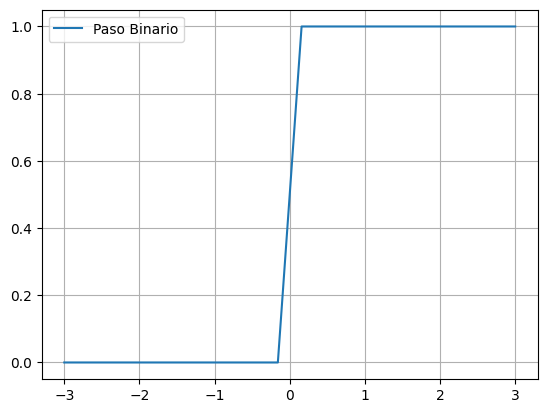

In [ ]:
# se importan algunas funciones importantes
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import math
# dominio de las graficas
x = np.linspace(-3, 3, 20)

# funciones comunes de activasion
PasoBinario = lambda x: np.heaviside(x,0)

# Definimos algunos parámetros para la gráfica
plt.plot(x, PasoBinario(x),label="Paso Binario")
plt.grid()
plt.legend()

# Mostramos la leyenda de las gráficas
plt.show()

Es decir.

$$f\left(x\right)=\begin{cases}
1 \quad si & x\gt0\\
0 \quad & e.o.c.
\end{cases}$$

En el contexto de las redes neuronales podemos pensar en esta función de la siguiente manera.

$$f\left(\vec{x}\right)=\begin{cases}
1 \quad si & \vec{w}\circ\vec{x} +b\gt0\\
0 \quad & e.o.c.
\end{cases}$$

Donde:

*   $\vec{w}$ es el vector de pesos asociados a las entradas.
*   $\vec{x}$ es el vector de entradas.
*   $b$ es el sesgo o *bias*.

Estos cambios en la función de activación se deben a que, para fines prácticos es mejor pensar en las entradas de una neurona (o red neuronal) como un vector, además recordemos que las *GPU's* estan optimizadas para operaciones con vectores y con matrices.

# Ejemplo operador $AND$

Igual que en el caso del cerebro humano, existen diferentes zonas del cerebro que muestran actividad con diferentes estimulos, tratemos de diseñar un perceptrón (neurona artificial) que reproduzca el comportamiento del operador logico $AND$ (&&).

Recordemos la tabla de verdad de este operador lógico.

| $x_1$ | $x_2$ | $and$ |
| :-:   |    :-:|  :-:  |
| 0     | 0     | 0     |
| 0     | 1     | 0     |
| 1     | 0     | 0     |
| 1     | 1     | 1     |

La idea es que podamos definir un algoritmo que funcione como el operador lógico $AND$.

Pensemos que este perceptrón luce de esta forma.

<center>
<img src="https://github.com/jugernaut/ProgramacionEnParalelo/blob/main/Imagenes/RedesNeuronales/NeuronaAND.png?raw=1" width="600">
</center>



## Inteligencia Artificial (tradicional)

La forma más sencilla de definir este operador es con un *if*, es decir.

In [ ]:
'''
versión primitiva del perceptron
x: vector de entradas
w: vector de pesos
'''
def perceptrAND(x, w=None, b=None):
    if x[0]==1 and x[1]==1:
        return 1
    else:
        return 0

# prueba de la funcion, ¡CAMBIA EL VECTOR DE ENRTADAS!
print(perceptrAND([0,0]))


0


Esta es la forma tradicional en la cual se resolvían muchos de los problemas de inteligencia artificial antes de la llegada del *machine learning*.

El código de la celda anterior funciona y resuelve el problema planteado inicialmente, sin embargo **esta solución es estática**, ya no puede modificarse por si misma para "aprender" un nuevo comportamiento.

## Razonamiento cognitivo

Veamos otra forma de solucionar el mismo problema.

Lo primero que debemos notar de la tabla de verdad es que, si **cambiamos el orden de las entradas** ($x_1, x_2$) en cada caso, el resultado no cambia.

Lo segundo que hay que notar es que la suma $\vec{w} * \vec{x} +b$ siempre debe ser negativa, excepto cuando $x_1=1$ y $x_2=1$, tal como se muestra en la tabla de verdad.

Reescribiendo nuestra tabla de verdad para considerar las entradas del perceptrón la podemos pensar de la siguiente forma.

\begin{array}{c}
1w_1+1w_2+b>0\\
0w_1+1w_2+b\leq0\\
1w_1+0w_2+b\leq0\\
0w_1+0w_2+b\leq0 \tag{1}
\end{array}

Por otro lado, sabemos que:

*   $x*0=0$
*   $1x+1x=2x $
*   $1x=x$

Combinando (1), lo que sabemos y el hecho de que $w_1 = w_2 = w$ debido a que **ambas entradas son igual de importantes**, podemos simplificar lo anterior de la siguiente forma.

\begin{array}{c}
2w+b>0\\
w+b\leq0\\
b\leq0\\ \tag{2}
\end{array}

De (2) podemos concluir que $2w+b$ tiene que ser un valor **positivo**, $w+b$ es **negativo o cero** y $b$ es un valor **negativo o cero**.

Notemos que:


*   $b$ no puede ser cero, ya que que de ser así $2w\gt0$ y $w\leq0$, lo que no puede ser verdad. Por lo tanto **$b$ no puede ser cero**.
*   $w$ debe ser positivo, si $w$ fuese negativo $2w$ también sería negativo y $2w+b$ no podría ser un valor positivo y $2w+b\gt0$ no podría ser verdad. Por lo tanto **$w$ debe ser positivo**.
*   ya que $w$ debe ser positivo, $b$ no puede ser cero, entonces para que $w+b\leq0$ sea verdadero debemos elegir a **$b$ como el opuesto aditivo de $w$**.

¡¡¡Ya lo tenemos!!!, modificando el código de la celda anterior tenemos lo siguiente.

In [ ]:
'''
versión mejorada del perceptron
x: vector de entradas
w: vector de pesos
'''
def perceptrAND2(x, w):
    return np.heaviside(x[0]*w[0]+x[1]*w[1]+w[2], 0)

# prueba de la funcion ¡CAMBIA EL VECTOR DE ENRTADAS!
print(perceptrAND2([0,1],[1,1,-1]))


0.0


La celda superior muestra una versión mejorada del `perceptrAND` que hace uso del conocimiento previo (axiomas matemáticos y razonamiento) y de los estimulos externos (entradas $\vec{x}$).

Sin embargo tiene el mismo problema que la versión previa del `perceptrAND`.

# Perceptrón

La parte realmente trascendente del modelo perceptrón es el proceso de aprendizaje, esto convierte al perceptrón en un algoritmo que aprende de la experiencia y modifica su comportamiento, veamos como se lleva a cabo este proceso.




## Aprendizaje

Estos son los pasos descritos en lenguaje natural, que llevan al perceptrón a ajustar sus pesos $\vec{w}$ y sesgo $b$ para realizar el proceso de aprendizaje, es decir, que logre clasificar de manera acertada el conjunto de datos que recibe como entradas $\vec{x}$.

1.   Dar un valor inicial para el vector de pesos $\vec{w}$, a veces aleatorio, o de manera más sencilla, el vector cero $\vec{0}$.
2.   Para cada tupla de entrada del conjunto de entrenamiento, el perceptrón realiza las siguientes acciones:
> *   Tratará de dar una predicción para los valores de entrada.
> *   Esta predicción se compara con la salida esperada.
> *   Evalua la siguiente tupla.

Antes de continuar hay un par de cosas que debemos definir, de manera muy similar al error que se tiene en una aproximación numérica, vamos a determinar que tan buena es la predicción del perceptrón de la siguiente forma.

`salida_esperada - salida_actual`

En otras palabras, necesitamos una forma de evaluar el desempeño del perceptrón y una forma de hacerlo es mediante la resta anterior. Eso lo podemos poner en términos matemáticos tal como sigue y posteriormente le llamaremos **función de costos** o **función perdida**.

$$e=y-f(\vec{x})$$

Donde $e$ es el error que se tiene entre la salida esperada denotada por $y$ contra la salida del perceptrón $f(\vec{x})$.

Dado que ambos valores son binarios, $e=y-f(\vec{x})$ solo puede producir 3 valores, que se muestran a continuación.

| $y$ |     $$f(\vec{x})$$      | $$y - f$$ |
| :-:      |    :-:     |  :-:    |
| 1     | 1     | 0     |
| 0     | 0     | 0     |
| 1     | 0     | 1     |
| 0     | 1     |-1     |

La idea es minimizar nuestro error (función de costos), así que para este fin veamos una frase celebre del creador del perceptrón **Frank Rosenblatt**.

> *   *Si la neurona se activa cuando no lo deseamos, suprimela*.
> *   *Si la neurona no se activa cuando lo deseamos, exitala*.
> *   *Si la neurona se activa cuando lo deseamos, no la molestes*.

Ya sabemos como evaluar el desempeño de nuestro perceptrón, ahora solo resta definir como suprimirlo y como exitarlo.

## Premio y Castigo

**Castigo**: Si el perceptrón devuelve un 1 ($f(\vec{x})=1$), cuando el resultado esperado era un 0 ($y=0$), necesitamos hacer un ajuste disminuyendo el valor de $\vec{w}\circ\vec{x}$, ya que lo que se busca es que $f(\vec{x})=\vec{w}\circ\vec{x}\leq 0$.

**Castigo**: Si el perceptrón devuelve un 0 ($f(\vec{x})=0$), cuando el resultado esperado era un 1 ($y=1$), necesitamos hacer un ajuste aumentando el valor de $\vec{w}\circ\vec{x}$, ya que lo que se busca es que $f(\vec{x})=\vec{w}\circ\vec{x}\gt 0$.

**Premio**: Si el perceptrón devuelve el valor esperado ($f(\vec{x})=y$) entonces hay que darle un premio, es decir, no hacer algo ya que la neurona está funcionando como debe ser.

Dado que no podemos modificar los valores de las entradas $\vec{x}$ ya que son los datos que usa el perceptrón para realizar sus predicciones, solo resta modificar los valores de $\vec{w}$.

Así que en pseudocódigo, lo anterior se traduce en lo siguiente.

\begin{array}{ccc}
\vec{w}\leftarrow\vec{w}+\vec{x} & si & y-f(\vec{x})==1\\
\vec{w}\leftarrow\vec{w}-\vec{x} & si & y-f(\vec{x})==-1\\
\vec{w}\leftarrow\vec{w} & si & y-f(\vec{x})==0 \tag{3}
\end{array}

En pocas palabras, para incrementar el valor de $\vec{w}$ simplemente sumamos $\vec{x}$ y para disminuir el valor de $\vec{w}$ simplemente restamos $\vec{x}$.

Dado que $y-f(\vec{x})$ produce $1$, $-1$ ó $0$ podemos simplificar reescribiendo (3). Y de manera similar trabajamos con el sesgo ($b$), con la diferencia de que simplemente se multiplica por $1$, es decir.

\begin{array}{ccc}
\vec{w}\leftarrow\vec{w}+(y-f(\vec{x}))*\vec{x}\\
b\leftarrow b+(y-f(\vec{x}))*1\tag{4}
\end{array}

¡¡¡Listo!!!, gracias a la expresión $(4)$ ya tenemos el mecanismo que llevará a nuestro perceptrón a aprender y adaptarse a los datos de entrada.

Vamos a usar los siguientes datos de entrenamiento.

| $x_1$ | $x_2$ | Salida esperada |
| :-:   |    :-:|            :-:  |
| 0     | 0     | 0               |
| 0     | 1     | 0               |
| 1     | 0     | 0               |
| 1     | 1     | 1               |



## Entrenamiento

#Valores iniciales del vector $\vec{w}$.

w = [0, 0, 0] => [bias, w1, w2]

#Entradas de entrenamiento

x = [1, 1, 1] => [entrada_bias, x1, x2]

y = 1

#Salida del perceptrón

f(x) = 1 if w · x > 0,
       0 otro caso

w · x == (0 * 1) + (0 * 1) + (0 * 1) == 0
      ∴  f(x) = 0

#Comparando resultados

e = y - f(x) => 1

#Manazo por que no fue el resultado esperado

w <- w + 1 * x  => [1, 1, 1]

Y este procedimiento se repite con todos los datos de entrada.

# Implementación

Dado que el proceso de aprendizaje es un proceso sumamente repetitivo y gracias a que tenemos un algoritmo para llevarlo a cabo, lo más sencillo es plasmar estos conceptos en código de *Python*.

Además vamos a usar el paradigma orientado a objetos para darle una apariencia similar a las que se usan en *API's* como *TensorFlow*.

In [ ]:
'''
MIT License
Copyright (c) 2018 Thomas Countz
Codigo tomado del sitio
https://medium.com/@thomascountz/19-line-line-by-line-python-perceptron-b6f113b161f3
'''
import numpy as np

# Definicion de la clase que hereda de la clase object
class Perceptron(object):
  '''
  Constructor que recibe los siguientes parametros
  num_entradas:     numero de entradas del vector de entradas
  limite:           es el limite de iteraciones mientras entrenamos
  tasa_aprendizaje: magnitud en la que se incrementan los pesos
  '''
  def __init__(self, num_entradas, limite=15, tasa_aprendizaje=0.01):
    self.limite = limite
    self.tasa_aprendizaje = tasa_aprendizaje
    self.pesos = np.zeros(num_entradas + 1) #se suma uno por el bias

  '''
  Metodo que nos devuelve la prediccion del perceptron
  entradas: vector de entradas para realizar la prediccion
  '''
  def prediccion(self, entradas):
    # suma ponderada x*w, pesos[0] = bias
    suma = np.dot(entradas, self.pesos[1:]) + self.pesos[0]
    # funcion de activacion equivalente a np.heaviside
    if suma > 0:
      activacion = 1
    else:
      activacion = 0
    return activacion

  '''
  Metodo que entrena al percetron
  entradas_ent: vector de vectores de entradas para entrenar
  etiquetas:    valores esperados por cada entrada del vector de entradas
  '''
  def entrenamiento(self, entradas_ent, etiquetas, debbug=False):
    # por cada epoca en el limite de entrenamientos
    for _ in range(self.limite):
      # tomamos una entrada y su respectiva etiqueta
      for entrada, etiqueta in zip(entradas_ent, etiquetas):
        prediccion = self.prediccion(entrada)
        # ajuste de pesos w <- w + (y-f(x)) * x
        self.pesos[1:] += self.tasa_aprendizaje * (etiqueta - prediccion) * entrada
        # ajuste del bias
        self.pesos[0] += self.tasa_aprendizaje * (etiqueta - prediccion) # *1
        # (SECCION DE DEBUGEO)
        if debbug:
          if prediccion != etiqueta:
            print("chanclazo por no aprender")
            input("Continuar?")
          else:
            print("bien hecho muchacho")
            input("Continuar?")
          #self.grafica()

  def grafica(self):
     print(self.pesos)
     # dominio de la grafica
     dominio = np.linspace(-0.25, 1.25, 10)
     # funcion a graficar
     graf = lambda x: (-self.pesos[0]-self.pesos[1]*x)/self.pesos[2]

     # definimos algunos parámetros para la gráfica
     fig, ax = plt.subplots()
     # recta generada por el perceptron
     ax.plot(dominio, graf(dominio))
     # valores de entrada para el perceptron
     xs = [0,1,0,1]
     ys = [0,0,1,1]
     # etiquetas
     ax.scatter(xs, ys)
     ax.annotate('(0,0)', (xs[0],ys[0]), xytext=(0.125, 0.125), arrowprops = dict(  arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"))
     ax.annotate('(1,0)', (xs[1],ys[1]), xytext=(1, 0.125), arrowprops = dict(  arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"))
     ax.annotate('(0,1)', (xs[2],ys[2]), xytext=(0.125, 0.75), arrowprops = dict(  arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"))
     ax.annotate('(1,1)', (xs[3],ys[3]), xytext=(1, 0.75), arrowprops = dict(  arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"))
     # ejes coordenados
     ax.axhline(y=0, color='k')
     ax.axvline(x=0, color='k')
     plt.title("Perceptrón")

     plt.grid()
     plt.show()


## Ejecución

Veamos los resultados.

In [ ]:
# entrenamiento AND
entradas_ent = []
entradas_ent.append(np.array([1, 1]))
entradas_ent.append(np.array([1, 0]))
entradas_ent.append(np.array([0, 1]))
entradas_ent.append(np.array([0, 0]))

etiquetas = np.array([1, 0, 0, 0])

'''# entrenamiento OR
entradas_ent = []
entradas_ent.append(np.array([1, 1]))
entradas_ent.append(np.array([1, 0]))
entradas_ent.append(np.array([0, 1]))
entradas_ent.append(np.array([0, 0]))

etiquetas = np.array([1, 1, 1, 0])'''

perceptron = Perceptron(2)
perceptron.entrenamiento(entradas_ent, etiquetas)

entradas = np.array([0, 0])
print(perceptron.prediccion(entradas))

entradas = np.array([1, 0])
print(perceptron.prediccion(entradas))

entradas = np.array([0, 1])
print(perceptron.prediccion(entradas))

entradas = np.array([1, 1])
print(perceptron.prediccion(entradas))

# vector que contiene el sesgo y pesos
print(perceptron.pesos)

0
0
0
1
[-0.02  0.01  0.02]


# ¿Regresión lógica (mínimos cuadrados)?

Después de haber entrenado al `perceptrón`, comprobar que logró aprender y que ya se comporta como esperamos, ¿qué podémos decir respecto a sus pesos y el sesgo (*bias*)?.

Como puedes ver, estos valores corresponden a lo siguiente.

\begin{array}{c}
b = -0.2\\
w_1=0.1\\
w_2=0.2 \tag{5}
\end{array}

Si usamos estos parámetros para mostrar gráficamente los resultados de nuestro `perceptrón`, tendríamos lo siguiente.

\begin{array}{ccc}
\vec{w}\circ\vec{x}+b & = & w_{1}*x_{1}+w_{2}*x_{2}+b\\
 & = & 0.1*x_{1}+0.2*x_{2}-0.2\\
 & \Rightarrow & x_{2}=\frac{0.2-0.1*x_{1}}{0.2}
\end{array}

Con lo que obtenemos la siguiente gráfica.

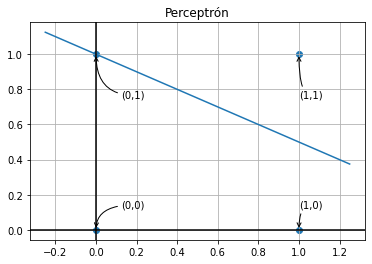

In [ ]:
# dominio de la grafica
dominio = np.linspace(-0.25, 1.25, 10)
# funcion a graficar
graf = lambda x: (0.2-0.1*x)/0.2

# definimos algunos parámetros para la gráfica
fig, ax = plt.subplots()
# recta generada por el perceptron
ax.plot(dominio, graf(dominio))
# valores de entrada para el perceptron
xs = [0,1,0,1]
ys = [0,0,1,1]
# etiquetas
ax.scatter(xs, ys)
ax.annotate('(0,0)', (xs[0],ys[0]), xytext=(0.125, 0.125), arrowprops = dict(  arrowstyle="->",
                        connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate('(1,0)', (xs[1],ys[1]), xytext=(1, 0.125), arrowprops = dict(  arrowstyle="->",
                        connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate('(0,1)', (xs[2],ys[2]), xytext=(0.125, 0.75), arrowprops = dict(  arrowstyle="->",
                        connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate('(1,1)', (xs[3],ys[3]), xytext=(1, 0.75), arrowprops = dict(  arrowstyle="->",
                        connectionstyle="angle3,angleA=0,angleB=-90"))
# ejes coordenados
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.title("Perceptrón")

plt.grid()
plt.show()

Con esta gráfica se puede apreciar, que el `perceptrón` fue capaz de encontrar los valores de los pesos y sesgo que nos ayudan a dividir (ó en otras palabras a **clasificar**) los valores de entrada que se le muestran al mismo.

Es curioso que todo este procedimiento se asemeja al procedimiento de regresión lineal haciendo uso de **mínimos cuadrados**.

Puedes encontrar una explicación más detallada de este procedimiento en el siguiente [enlace](https://colab.research.google.com/github/jugernaut/Prometeo/blob/master/04_M%C3%A9todosNum%C3%A9ricos/02_M%C3%ADnimosCuadrados/01_Minimos_cuadrados.ipynb).

# Aprendizaje

Como podemos notar, el `perceptrón` ha aprendido y después de haberlo entrenado ya logra reproducir el comportamiento del operador lógico *AND* (&&) y eso que solo hemos hecho uso de un solo `perceptrón`.

Ya que comprendimos su funcionamiento, surgen nuevas preguntas:

*   ¿Podémos hacer que este `perceptrón` logre "aprender" **cualquier comportamiento**, por ejemplo el operador $OR$ o el operador $XOR$?.
*   ¿Qué sucede si generamos "capas" de **perceptrones enlazados** donde las salidas de toda una capa sean las entradas de otra nueva capa?.
*   ¿Podémos pensar en el proceso de aprendizaje como un **problema de minimización** de costos?, y de ser así ¿conoces algúna función matemática que nos ayude a encontrar **valores mínimos**?.






<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/redesNeuronales/perceptron1.gif?raw=1" width="550">
</center>

#  Referencias

*   [Prometeo](https://github.com/jugernaut/Prometeo)
*   [Perceptrón](https://medium.com/@thomascountz/19-line-line-by-line-python-perceptron-b6f113b161f3)
*   [Brilliant](https://brilliant.org/practice/intelligent-computers-menace/?chapter=introduction-to-neural-networks)
*   [Simulador](https://ml4a.github.io/ml4a/es/neural_networks/)
*   [NetLogo](https://ccl.northwestern.edu/netlogo/)
*   [Red neuronal desde cero](https://futurelab.mx/redes%20neuronales/inteligencia%20artificial/2019/06/25/intro-a-redes-neuronales-pt-1/)
*   [Libro Web](http://neuralnetworksanddeeplearning.com/index.html)
*   [Aprendizaje profundo](https://www.deeplearningbook.org/)
*   [Lista de videos](https://www.youtube.com/playlist?list=PLo8YL3HL50lUHQS80oE_ypxFi0Y3uCVal)
*   [Algebra Lineal](https://www.youtube.com/playlist?list=PLIb_io8a5NB2DddFf-PwvZDCOUNT1GZoA)
